## Import Libraries

In [1]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing matplotlib.pyplot for creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt

# Importing seaborn for statistical data visualization and aesthetic plotting
import seaborn as sns


## Reading Data

In [2]:
# Reading the CSV file named "Adidas US Sales Datasets.csv" into a DataFrame with UTF-8 encoding
adidas_1 = pd.read_csv("Adidas US Sales Datasets.csv", encoding="utf-8")

# Displaying the contents of the DataFrame
adidas_1

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$6,00,000","$3,00,000",50%,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$5,00,000","$1,50,000",30%,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$4,00,000","$1,40,000",35%,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",35%,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",30%,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,24-01-2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9644,Foot Locker,1185732,24-01-2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9645,Foot Locker,1185732,22-02-2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9646,Foot Locker,1185732,22-02-2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet


In [3]:
# Displaying information about the DataFrame, including the number of entries, column names, non-null counts, and data types
adidas_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


In [4]:
# Replacing spaces in column names with underscores for better compatibility and readability
adidas_1.columns = adidas_1.columns.str.replace(" ", "_")

# Displaying the updated column names
adidas_1.columns

Index(['Retailer', 'Retailer_ID', 'Invoice_Date', 'Region', 'State', 'City',
       'Product', 'Price_per_Unit', 'Units_Sold', 'Total_Sales',
       'Operating_Profit', 'Operating_Margin', 'Sales_Method'],
      dtype='object')

In [5]:
# Converting the "Invoice_Date" column to datetime format and then formatting it to "mm-yyyy"
adidas_1["Invoice_Date"] = pd.to_datetime(adidas_1["Invoice_Date"], format="%d-%m-%Y").dt.strftime("%m-%Y")

# Extracting the product category from the "Product" column by removing "'s" and taking the part after the first word
adidas_1["Product_Category"] = adidas_1["Product"].str.replace("'s", "").apply(lambda x: " ".join(x.split()[1:])).to_list()

# Extracting the gender type from the "Product" column by removing "'s" and taking the first word
adidas_1["Gender_Type"] = adidas_1["Product"].str.replace("'s", "").apply(lambda x: " ".join(x.split()[:1])).to_list()

In [6]:
# Dropping the "Product" and "Retailer_ID" columns from the DataFrame
adidas_1.drop(["Product", "Retailer_ID"], axis=1, inplace=True)

In [7]:
# Removing commas, dollar signs, and ".00" from the "Price_per_Unit" column and replacing spaces with "0"
adidas_1["Price_per_Unit"] = adidas_1["Price_per_Unit"].str.replace(",", "").str.replace("$", "").str.replace(".00", "").str.replace(" ", "0")

# Removing commas and dollar signs from the "Total_Sales" column
adidas_1["Total_Sales"] = adidas_1["Total_Sales"].str.replace(",", "").str.replace("$", "")

# Removing commas and dollar signs from the "Operating_Profit" column
adidas_1["Operating_Profit"] = adidas_1["Operating_Profit"].str.replace(",", "").str.replace("$", "")

# Removing percentage signs and any leading or trailing whitespace from the "Operating_Margin" column
adidas_1["Operating_Margin"] = adidas_1["Operating_Margin"].str.replace("%", "").str.strip()

# Removing commas, dollar signs, and any leading or trailing whitespace from the "Units_Sold" column
adidas_1["Units_Sold"] = adidas_1["Units_Sold"].str.replace(",", "").str.replace("$", "").str.strip()

In [8]:
# Converting columns to appropriate data types
adidas_1 = adidas_1.astype({
    "Price_per_Unit": "int64",       # Converting "Price_per_Unit" to 64-bit integer
    "Total_Sales": "int64",          # Converting "Total_Sales" to 64-bit integer
    "Operating_Profit": "int32",     # Converting "Operating_Profit" to 32-bit integer
    "Operating_Margin": "float64",   # Converting "Operating_Margin" to 64-bit float
    "Units_Sold": "int64"            # Converting "Units_Sold" to 64-bit integer
})

# Adjusting "Price_per_Unit" by integer division by 10
adidas_1["Price_per_Unit"] = adidas_1["Price_per_Unit"] // 10

# Converting "Operating_Margin" from percentage to a decimal by dividing by 100
adidas_1["Operating_Margin"] = adidas_1["Operating_Margin"] / 100


In [9]:
# Displaying information about the DataFrame, including the number of entries, column names, non-null counts, and data types
adidas_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Invoice_Date      9648 non-null   object 
 2   Region            9648 non-null   object 
 3   State             9648 non-null   object 
 4   City              9648 non-null   object 
 5   Price_per_Unit    9648 non-null   int64  
 6   Units_Sold        9648 non-null   int64  
 7   Total_Sales       9648 non-null   int64  
 8   Operating_Profit  9648 non-null   int32  
 9   Operating_Margin  9648 non-null   float64
 10  Sales_Method      9648 non-null   object 
 11  Product_Category  9648 non-null   object 
 12  Gender_Type       9648 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(8)
memory usage: 942.3+ KB


In [10]:
# Reordering columns in the DataFrame and selecting a specific subset of columns
adidas_1 = adidas_1[["Retailer", "Invoice_Date", "Region", "State", "City", "Gender_Type", "Product_Category",
                     "Price_per_Unit", "Units_Sold", "Total_Sales", "Operating_Profit", "Operating_Margin", "Sales_Method"]]

# Displaying the updated DataFrame with the reordered and selected columns
adidas_1

,Retailer,Invoice_Date,Region,State,City,Gender_Type,Product_Category,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method
0,Foot Locker,01-2020,Northeast,New York,New York,Men,Street Footwear,50,1200,600000,300000,0.50,In-store
1,Foot Locker,01-2020,Northeast,New York,New York,Men,Athletic Footwear,50,1000,500000,150000,0.30,In-store
2,Foot Locker,01-2020,Northeast,New York,New York,Women,Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,01-2020,Northeast,New York,New York,Women,Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,01-2020,Northeast,New York,New York,Men,Apparel,60,900,540000,162000,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,01-2021,Northeast,New Hampshire,Manchester,Men,Apparel,50,64,3200,896,0.28,Outlet
9644,Foot Locker,01-2021,Northeast,New Hampshire,Manchester,Women,Apparel,41,105,4305,1378,0.32,Outlet
9645,Foot Locker,02-2021,Northeast,New Hampshire,Manchester,Men,Street Footwear,41,184,7544,2791,0.37,Outlet
9646,Foot Locker,02-2021,Northeast,New Hampshire,Manchester,Men,Athletic Footwear,42,70,2940,1235,0.42,Outlet


In [11]:
# Reading the CSV file named "AdidasSalesdata.csv" into a DataFrame with UTF-8 encoding
adidas_2 = pd.read_csv("AdidasSalesdata.csv", encoding="utf-8")

# Displaying the contents of the DataFrame
adidas_2

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,"Tuesday, October 26, 2021",Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750,24062.50,0.35,Outlet
1,Foot Locker,1185732,"Wednesday, October 27, 2021",Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250,30375.00,0.30,Outlet
2,Foot Locker,1185732,"Thursday, October 28, 2021",Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750,117562.50,0.55,Outlet
3,Foot Locker,1185732,"Friday, October 29, 2021",Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250,19687.50,0.35,Outlet
4,Foot Locker,1185732,"Saturday, October 30, 2021",Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250,24500.00,0.40,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,West Gear,1128299,"Saturday, March 14, 2020",West,Nevada,Las Vegas,Women,Apparel,56,170,9520,1713.60,0.18,Outlet
9644,West Gear,1128299,"Sunday, March 15, 2020",West,Nevada,Las Vegas,Men,Street Footwear,20,149,2980,1192.00,0.40,Outlet
9645,West Gear,1128299,"Monday, March 16, 2020",West,Nevada,Las Vegas,Men,Athletic Footwear,31,145,4495,1123.75,0.25,Outlet
9646,West Gear,1128299,"Tuesday, March 17, 2020",West,Nevada,Las Vegas,Women,Street Footwear,26,128,3328,1397.76,0.42,Outlet


In [12]:
# Displaying information about the DataFrame, including the number of entries, column names, non-null counts, and data types
adidas_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Gender Type       9648 non-null   object 
 7   Product Category  9648 non-null   object 
 8   Price per Unit    9648 non-null   int64  
 9   Units Sold        9648 non-null   int64  
 10  Total Sales       9648 non-null   int64  
 11  Operating Profit  9648 non-null   float64
 12  Operating Margin  9648 non-null   float64
 13  Sales Method      9648 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 1.0+ MB


In [13]:
# Replacing spaces in column names with underscores for better compatibility and readability
adidas_2.columns = adidas_2.columns.str.replace(" ", "_")

# Displaying the updated column names
adidas_2.columns

Index(['Retailer', 'Retailer_ID', 'Invoice_Date', 'Region', 'State', 'City',
       'Gender_Type', 'Product_Category', 'Price_per_Unit', 'Units_Sold',
       'Total_Sales', 'Operating_Profit', 'Operating_Margin', 'Sales_Method'],
      dtype='object')

In [14]:
# Converting the "Invoice_Date" column to datetime format and then formatting it to "mm-yyyy"
adidas_2["Invoice_Date"] = pd.to_datetime(adidas_2["Invoice_Date"], format="%A, %B %d, %Y").dt.strftime("%m-%Y")


In [15]:
# Dropping the "Retailer_ID" column from the DataFrame
adidas_2.drop("Retailer_ID", axis=1, inplace=True)

In [16]:
# Converting the "Operating_Profit" column to integer data type
adidas_2["Operating_Profit"] = adidas_2["Operating_Profit"].astype("int")


In [17]:
# Displaying information about the DataFrame, including the number of entries, column names, non-null counts, and data types
adidas_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Invoice_Date      9648 non-null   object 
 2   Region            9648 non-null   object 
 3   State             9648 non-null   object 
 4   City              9648 non-null   object 
 5   Gender_Type       9648 non-null   object 
 6   Product_Category  9648 non-null   object 
 7   Price_per_Unit    9648 non-null   int64  
 8   Units_Sold        9648 non-null   int64  
 9   Total_Sales       9648 non-null   int64  
 10  Operating_Profit  9648 non-null   int32  
 11  Operating_Margin  9648 non-null   float64
 12  Sales_Method      9648 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(8)
memory usage: 942.3+ KB


In [18]:
# Reordering columns in the DataFrame and selecting a specific subset of columns
adidas_2 = adidas_2[["Retailer", "Invoice_Date", "Region", "State", "City", "Gender_Type", "Product_Category",
                     "Price_per_Unit", "Units_Sold", "Total_Sales", "Operating_Profit", "Operating_Margin", "Sales_Method"]]

# Displaying the updated DataFrame with the reordered and selected columns
adidas_2

,Retailer,Invoice_Date,Region,State,City,Gender_Type,Product_Category,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method
0,Foot Locker,10-2021,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750,24062,0.35,Outlet
1,Foot Locker,10-2021,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250,30375,0.30,Outlet
2,Foot Locker,10-2021,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750,117562,0.55,Outlet
3,Foot Locker,10-2021,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250,19687,0.35,Outlet
4,Foot Locker,10-2021,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250,24500,0.40,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,West Gear,03-2020,West,Nevada,Las Vegas,Women,Apparel,56,170,9520,1713,0.18,Outlet
9644,West Gear,03-2020,West,Nevada,Las Vegas,Men,Street Footwear,20,149,2980,1192,0.40,Outlet
9645,West Gear,03-2020,West,Nevada,Las Vegas,Men,Athletic Footwear,31,145,4495,1123,0.25,Outlet
9646,West Gear,03-2020,West,Nevada,Las Vegas,Women,Street Footwear,26,128,3328,1397,0.42,Outlet


In [19]:
# Concatenating the two DataFrames (adidas_1 and adidas_2) along the rows (axis=0)
df_concatenated = pd.concat([adidas_1, adidas_2], axis=0)

# Saving the concatenated DataFrame to a CSV file named "Adidas_sales.csv" without row indices
df_concatenated.to_csv("Adidas_sales.csv", index=False)

In [20]:
# Reading the CSV file named "Adidas_sales.csv" into a DataFrame with UTF-8 encoding
adidas = pd.read_csv("Adidas_sales.csv", encoding="utf-8")

# Displaying the contents of the DataFrame
adidas

,Retailer,Invoice_Date,Region,State,City,Gender_Type,Product_Category,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method
0,Foot Locker,01-2020,Northeast,New York,New York,Men,Street Footwear,50,1200,600000,300000,0.50,In-store
1,Foot Locker,01-2020,Northeast,New York,New York,Men,Athletic Footwear,50,1000,500000,150000,0.30,In-store
2,Foot Locker,01-2020,Northeast,New York,New York,Women,Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,01-2020,Northeast,New York,New York,Women,Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,01-2020,Northeast,New York,New York,Men,Apparel,60,900,540000,162000,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19291,West Gear,03-2020,West,Nevada,Las Vegas,Women,Apparel,56,170,9520,1713,0.18,Outlet
19292,West Gear,03-2020,West,Nevada,Las Vegas,Men,Street Footwear,20,149,2980,1192,0.40,Outlet
19293,West Gear,03-2020,West,Nevada,Las Vegas,Men,Athletic Footwear,31,145,4495,1123,0.25,Outlet
19294,West Gear,03-2020,West,Nevada,Las Vegas,Women,Street Footwear,26,128,3328,1397,0.42,Outlet


In [21]:
# Counting the number of duplicated rows in the adidas DataFrame
adidas.duplicated().sum()


6684

In [22]:
# Dropping duplicated rows from the adidas DataFrame
adidas.drop_duplicates(inplace=True)

# Counting the number of duplicated rows after dropping duplicates
adidas.duplicated().sum()

0

In [23]:
# Resetting the index of the adidas DataFrame and dropping the old index
adidas.reset_index(drop=True, inplace=True)

# Displaying the updated DataFrame
adidas

,Retailer,Invoice_Date,Region,State,City,Gender_Type,Product_Category,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method
0,Foot Locker,01-2020,Northeast,New York,New York,Men,Street Footwear,50,1200,600000,300000,0.50,In-store
1,Foot Locker,01-2020,Northeast,New York,New York,Men,Athletic Footwear,50,1000,500000,150000,0.30,In-store
2,Foot Locker,01-2020,Northeast,New York,New York,Women,Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,01-2020,Northeast,New York,New York,Women,Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,01-2020,Northeast,New York,New York,Men,Apparel,60,900,540000,162000,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12607,West Gear,03-2020,West,Nevada,Las Vegas,Men,Apparel,49,136,6664,3598,0.54,Outlet
12608,West Gear,03-2020,West,Nevada,Las Vegas,Women,Apparel,56,170,9520,1713,0.18,Outlet
12609,West Gear,03-2020,West,Nevada,Las Vegas,Men,Athletic Footwear,31,145,4495,1123,0.25,Outlet
12610,West Gear,03-2020,West,Nevada,Las Vegas,Women,Street Footwear,26,128,3328,1397,0.42,Outlet


# visualization

## 1) Understanding Data

* Understand Columns
* check dtype -> df[col].astype()
* Describe Numerical Cols
* Describe Categorical Cols

In [24]:
# Displaying the column names of the DataFrame
adidas.columns

Index(['Retailer', 'Invoice_Date', 'Region', 'State', 'City', 'Gender_Type',
       'Product_Category', 'Price_per_Unit', 'Units_Sold', 'Total_Sales',
       'Operating_Profit', 'Operating_Margin', 'Sales_Method'],
      dtype='object')

In [25]:
# Displaying information about the DataFrame, including the number of entries, column names, non-null counts, and data types
adidas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12612 entries, 0 to 12611
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          12612 non-null  object 
 1   Invoice_Date      12612 non-null  object 
 2   Region            12612 non-null  object 
 3   State             12612 non-null  object 
 4   City              12612 non-null  object 
 5   Gender_Type       12612 non-null  object 
 6   Product_Category  12612 non-null  object 
 7   Price_per_Unit    12612 non-null  int64  
 8   Units_Sold        12612 non-null  int64  
 9   Total_Sales       12612 non-null  int64  
 10  Operating_Profit  12612 non-null  int64  
 11  Operating_Margin  12612 non-null  float64
 12  Sales_Method      12612 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.3+ MB


In [26]:
# Generating descriptive statistics for the DataFrame, including count, mean, standard deviation, min, max, and quartiles
adidas.describe()

,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin
count,12612.000000,12612.000000,12612.000000,12612.000000,12612.000000
mean,44.766492,237.156042,79299.001744,29257.352918,0.428574
std,14.660975,201.894825,133497.769085,50694.979164,0.097114
min,0.000000,0.000000,0.000000,0.000000,0.100000
25%,35.000000,101.000000,3905.500000,1756.000000,0.350000
50%,45.000000,168.000000,7988.500000,3645.000000,0.420000
75%,55.000000,300.000000,112500.000000,39375.000000,0.500000
max,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [27]:
# Counting the number of rows where "Operating_Profit" is equal to 0
(adidas["Operating_Profit"] == 0).sum()

4

In [28]:
# Dropping rows from the DataFrame where any of the specified columns are equal to 0
adidas.drop(adidas[(adidas[["Price_per_Unit", "Units_Sold", "Total_Sales", "Operating_Profit"]] == 0).any(axis=1)].index, axis=0, inplace=True)

# Resetting the index after dropping rows
adidas.reset_index(drop=True, inplace=True)

# Counting the number of rows where "Price_per_Unit" is equal to 0
(adidas["Price_per_Unit"] == 0).sum()

0

In [29]:
# Generating descriptive statistics for the DataFrame for object (categorical) columns
adidas.describe()

,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin
count,12603.000000,12603.000000,12603.000000,12603.000000,12603.000000
mean,44.788542,237.115528,79159.684996,29219.580655,0.428598
std,14.636980,201.809503,133195.341969,50625.380528,0.097093
min,7.000000,6.000000,160.000000,75.000000,0.100000
25%,35.000000,101.000000,3908.000000,1759.000000,0.350000
50%,45.000000,168.000000,7987.000000,3645.000000,0.420000
75%,55.000000,300.000000,112500.000000,39000.000000,0.500000
max,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [30]:
# Generating descriptive statistics for the DataFrame for object (categorical) columns
adidas.describe(include="O")

,Retailer,Invoice_Date,Region,State,City,Gender_Type,Product_Category,Sales_Method
count,12603,12603,12603,12603,12603,12603,12603,12603
unique,6,24,5,50,52,2,3,3
top,Foot Locker,09-2021,West,Texas,Portland,Men,Street Footwear,Online
freq,3426,978,3268,564,468,6336,4238,6714


In [31]:
# Iterating over columns with object (categorical) data type
for col in adidas.select_dtypes("object").columns:
    print(f"Column ({col}):-\n")
    # Displaying unique values in the column
    print(f"uniques:-\n", adidas[col].unique())
    # Displaying the count of each unique value in the column
    print(f"\nnumber of values:-\n{adidas[col].value_counts()}")
    print("\n", "ــ"*50, "\n")


Column (Retailer):-

uniques:-
 ['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']

number of values:-
Foot Locker      3426
West Gear        3129
Sports Direct    2674
Kohl's           1345
Amazon           1226
Walmart           803
Name: Retailer, dtype: int64

 ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ 

Column (Invoice_Date):-

uniques:-
 ['01-2020' '02-2020' '03-2020' '04-2020' '05-2020' '07-2020' '08-2020'
 '09-2020' '10-2020' '11-2020' '12-2020' '01-2021' '02-2021' '03-2021'
 '04-2021' '05-2021' '06-2021' '07-2021' '08-2021' '09-2021' '10-2021'
 '11-2021' '12-2021' '06-2020']

number of values:-
09-2021    978
01-2021    956
10-2021    951
05-2021    946
04-2021    938
08-2021    932
11-2021    904
12-2021    875
03-2021    873
02-2021    859
07-2021    856
06-2021    851
01-2020    194
08-2020    177
04-2020    172
03-2020    170
02-2020    159
07-2020    144
11-2020    132
05-2020    125
09-2020  

## 2) EDA

### 1)	What is the distribution of units sold per transaction?

In [32]:
# Generating descriptive statistics for the "Units_Sold" column, including count, mean, standard deviation, min, max, and quartiles
adidas[["Units_Sold"]].describe()

,Units_Sold
count,12603.000000
mean,237.115528
std,201.809503
min,6.000000
25%,101.000000
50%,168.000000
75%,300.000000
max,1275.000000


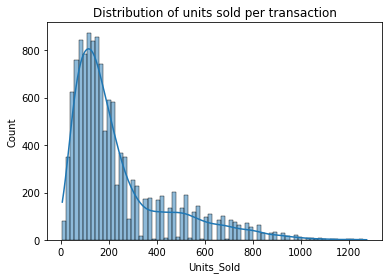

In [33]:
# Creating a histogram with a Kernel Density Estimate (KDE) for the "Units_Sold" column
sns.histplot(adidas, x="Units_Sold", kde=True)

# Setting the title of the plot
plt.title('Distribution of units sold per transaction')

# Displaying the plot
plt.show()

### 2)	What is the distribution of operating margins?

In [34]:
# Generating descriptive statistics for the "Operating_Margin" column, including count, mean, standard deviation, min, max, and quartiles
adidas[["Operating_Margin"]].describe()

,Operating_Margin
count,12603.000000
mean,0.428598
std,0.097093
min,0.100000
25%,0.350000
50%,0.420000
75%,0.500000
max,0.800000


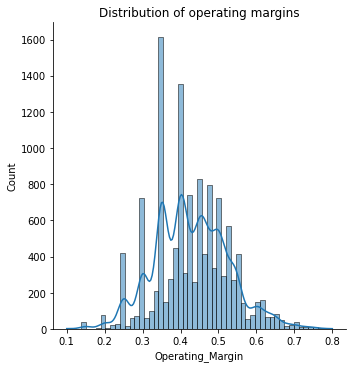

In [35]:
# Creating a distribution plot with a Kernel Density Estimate (KDE) for the "Operating_Margin" column
sns.displot(adidas, x='Operating_Margin', kde=True)

# Setting the title of the plot
plt.title('Distribution of operating margins')

# Displaying the plot
plt.show()

### 3)	What is the trend of total sales over the months and Sales method?

In [36]:
# Extract month and year and create a new column for grouping
adidas['Month_Year'] = pd.to_datetime(adidas['Invoice_Date'], format='%m-%Y').dt.to_period('M')

# Group by Month_Year and Sales_Method, then calculate total sales for each group
monthly_sales = adidas.groupby(['Month_Year', "Sales_Method"])['Total_Sales'].sum().reset_index()

# Convert Month_Year back to datetime for plotting
monthly_sales['Month_Year'] = monthly_sales['Month_Year'].dt.to_timestamp()

# Displaying the DataFrame with 'Month_Year' column sorted by 'Month_Year'
monthly_sales.sort_values(by='Month_Year')


,Month_Year,Sales_Method,Total_Sales
0,2020-01-01,In-store,3547500
1,2020-01-01,Online,553227
2,2020-01-01,Outlet,12755574
3,2020-02-01,In-store,7253750
4,2020-02-01,Online,553396
...,...,...,...
64,2021-11-01,In-store,26721500
66,2021-11-01,Outlet,14832299
68,2021-12-01,Online,35832447
67,2021-12-01,In-store,34791250


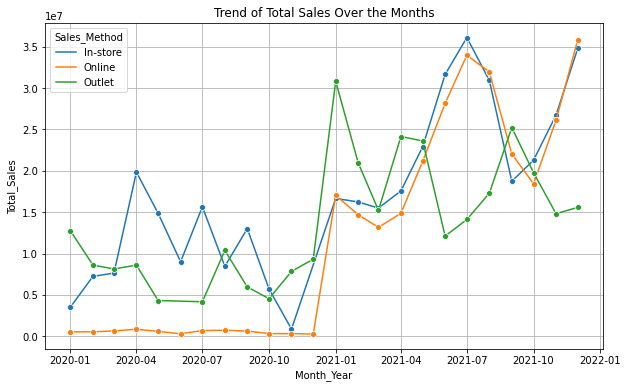

In [37]:
# Plotting the trend of total sales over the months using Seaborn
plt.figure(figsize=(10, 6))  # Setting the figure size
sns.lineplot(data=monthly_sales, x='Month_Year', y='Total_Sales', marker='o', hue='Sales_Method')  # Plotting the line plot with markers
plt.title('Trend of Total Sales Over the Months')  # Setting the title of the plot
plt.grid(True)  # Adding grid lines for better readability

# Displaying the plot
plt.show()


### 4)	How does the number of transactions vary by sales method?

In [38]:
# Counting the number of occurrences of each unique value in the "Sales_Method" column
adidas[["Sales_Method"]].value_counts()

Sales_Method
Online          6714
Outlet          3973
In-store        1916
dtype: int64

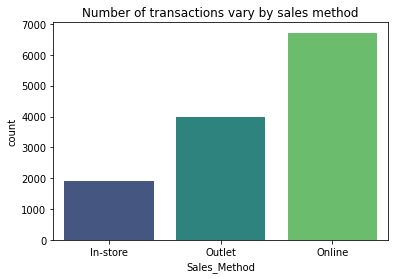

In [39]:
# Creating a count plot for the "Sales_Method" column with a 'viridis' color palette
sns.countplot(x=adidas['Sales_Method'], palette='viridis')

# Setting the title of the plot
plt.title('Number of transactions vary by sales method')

# Displaying the plot
plt.show()

 ### 5)	How does total sales vary by region?

In [40]:
# Grouping by "Region" and calculating the total sales for each region
region_sales = adidas.groupby("Region")[["Total_Sales"]].sum().reset_index()

# Displaying the DataFrame with total sales aggregated by region
region_sales

,Region,Total_Sales
0,Midwest,147064930
1,Northeast,206033087
2,South,156270122
3,Southeast,185221749
4,West,303059622


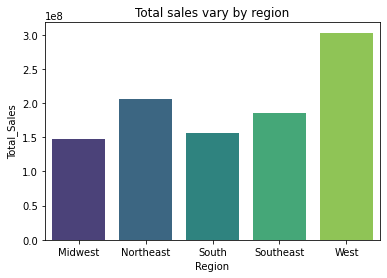

In [41]:
# Creating a bar plot for total sales by region with a 'viridis' color palette
sns.barplot(x='Region', y='Total_Sales', data=region_sales, palette='viridis', ci=None)

# Setting the title of the plot
plt.title('Total sales vary by region')

# Displaying the plot
plt.show()

### 6) How do total sales vary by state and gender type?

In [42]:
# Iterating over unique states in the "State" column
for un_state in adidas['State'].unique():
    # Filtering the DataFrame for the current state and grouping by "Gender_Type" to calculate total sales
    print(f"Total sales vary by state ({un_state}) and gender type:-\n\n", 
          adidas[adidas['State'] == un_state].groupby(["Gender_Type"])["Total_Sales"].sum().reset_index(), "\n")
    print("ــ"*50)

Total sales vary by state (New York) and gender type:-

   Gender_Type  Total_Sales
0         Men     37987146
1       Women     31446837 

ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
Total sales vary by state (Texas) and gender type:-

   Gender_Type  Total_Sales
0         Men     22936084
1       Women     25222885 

ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
Total sales vary by state (California) and gender type:-

   Gender_Type  Total_Sales
0         Men     31549826
1       Women     31207604 

ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
Total sales vary by state (Illinois) and gender type:-

   Gender_Type  Total_Sales
0         Men      5627829
1       Women      3649011 

ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
Total sales vary by state (Pennsylvan

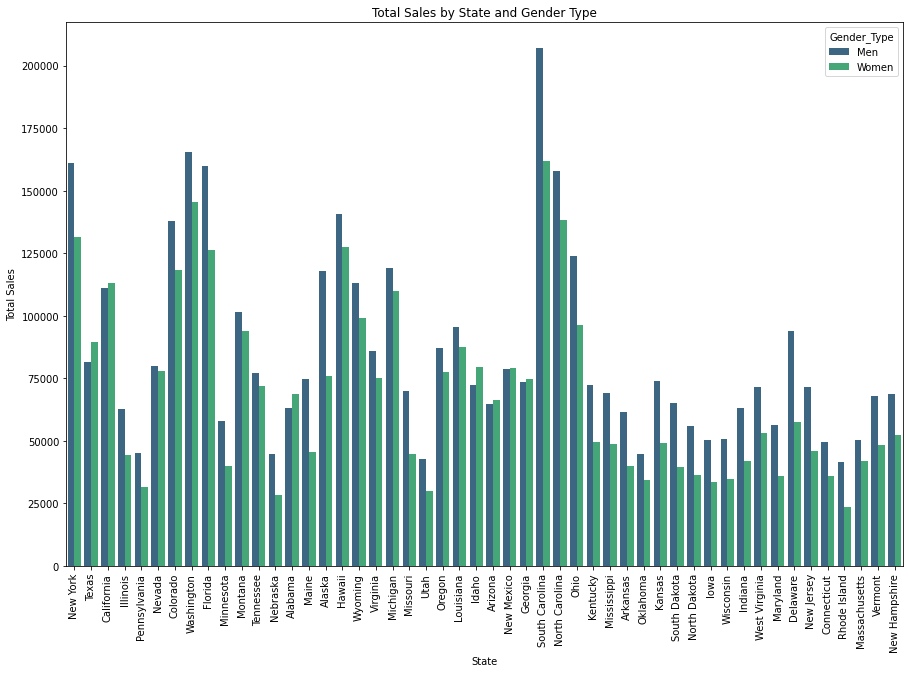

In [43]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Create the bar plot with 'State' on x-axis, 'Total_Sales' on y-axis, and 'Gender_Type' as hue
sns.barplot(x='State', y='Total_Sales', hue='Gender_Type', data=adidas, palette='viridis', ci=None)

# Set the title and labels
plt.title('Total Sales by State and Gender Type')
plt.xlabel('State')
plt.ylabel('Total Sales')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

### 7) What is the distribution of total sales among different cities?

In [44]:
# Grouping by "City" and calculating the total sales for each city
adidas.groupby("City")["Total_Sales"].sum().reset_index()

,City,Total_Sales
0,Albany,30526392
1,Albuquerque,22900530
2,Anchorage,19708374
3,Atlanta,21629559
4,Baltimore,8383127
5,Billings,17096797
6,Birmingham,18525934
7,Boise,22079633
8,Boston,13736656
9,Burlington,16708807


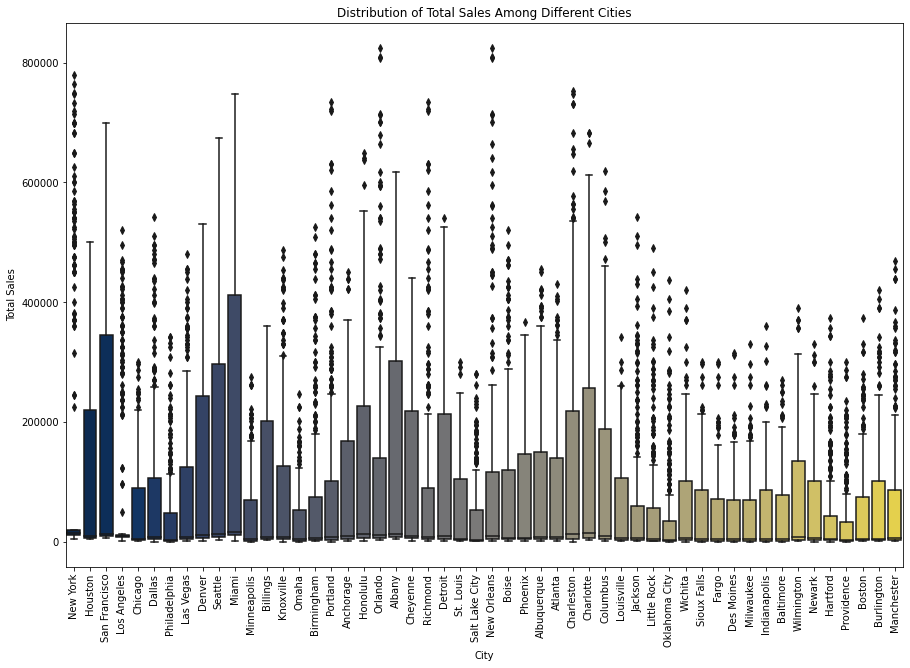

In [45]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Create the box plot with 'City' on x-axis and 'Total_Sales' on y-axis
sns.boxplot(x='City', y='Total_Sales', data=adidas, palette='cividis')

# Set the title and labels
plt.title('Distribution of Total Sales Among Different Cities')
plt.xlabel('City')
plt.ylabel('Total Sales')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

### 8) What is the distribution of total sales among product categories?

In [46]:
# Grouping by "Product_Category" and calculating the total sales for each category
adidas.groupby("Product_Category")["Total_Sales"].sum().reset_index()

,Product_Category,Total_Sales
0,Apparel,331038697
1,Athletic Footwear,287729427
2,Street Footwear,378881386


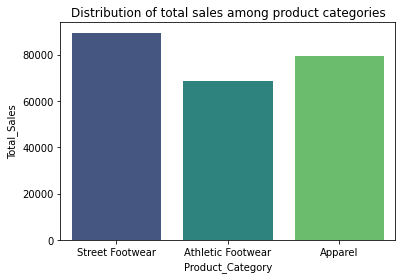

In [47]:
# Creating a bar plot for total sales by product category with a 'viridis' color palette
sns.barplot(x='Product_Category', y='Total_Sales', data=adidas, ci=None, palette='viridis')

# Setting the title of the plot
plt.title('Distribution of total sales among product categories')

# Displaying the plot
plt.show()

### 9) How does the price per unit impact units sold for different product categories?


In [48]:
# Group by "Product_Category" and "Price_per_Unit", then sum "Units_Sold"
grouped_data = adidas.groupby(['Product_Category', 'Price_per_Unit'])['Units_Sold'].sum().reset_index()

# Iterate through each unique product category and print the results
for un_Product_Category in grouped_data['Product_Category'].unique():
    # Filter the data for the current product category
    category_data = grouped_data[grouped_data['Product_Category'] == un_Product_Category]
    print(f"Impact of Price per Unit on Units Sold for Product Category ({un_Product_Category}):\n")
    # Display the Price_per_Unit and corresponding Units_Sold
    print(category_data[['Price_per_Unit', 'Units_Sold']], "\n")
    print("ــ" * 50)

Impact of Price per Unit on Units Sold for Product Category (Apparel):

    Price_per_Unit  Units_Sold
0               14         575
1               15         500
2               16         373
3               17         374
4               18        1561
..             ...         ...
81             100        2645
82             101         326
83             103         544
84             105        2600
85             110        2800

[86 rows x 2 columns] 

ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
Impact of Price per Unit on Units Sold for Product Category (Athletic Footwear):

     Price_per_Unit  Units_Sold
86                7         111
87               10         501
88               11         328
89               12         187
90               13         685
..              ...         ...
160              86         336
161              88         225
162              90        2600
163              92         

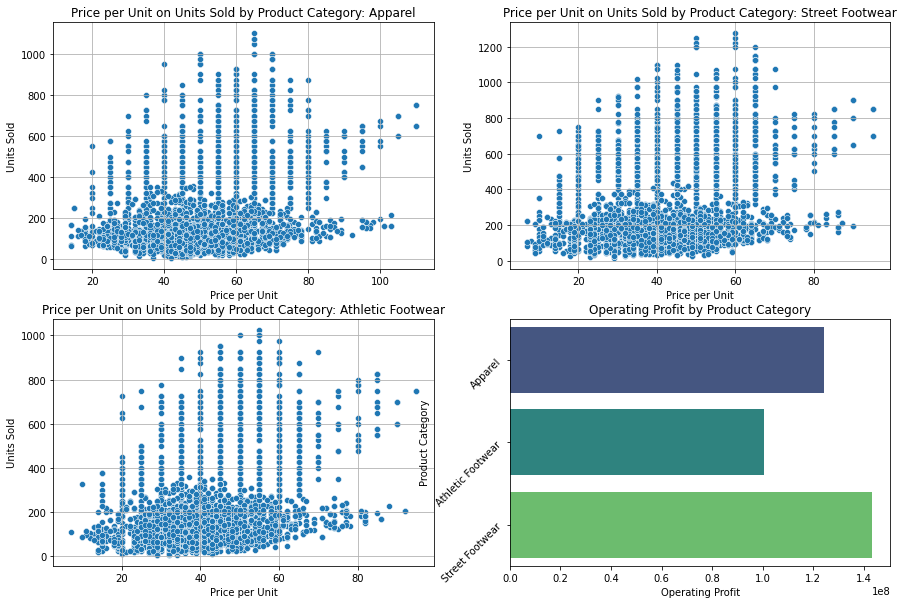

In [49]:
# Create subplots with a specific figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for "Apparel" category
plt.subplot(2, 2, 1)
sns.scatterplot(
    x=adidas[adidas["Product_Category"] == "Apparel"]['Price_per_Unit'],
    y=adidas[adidas["Product_Category"] == "Apparel"]['Units_Sold']
)
plt.title('Price per Unit on Units Sold by Product Category: Apparel')
plt.xlabel('Price per Unit')
plt.ylabel('Units Sold')
plt.grid(True)

# Plot for "Street Footwear" category
plt.subplot(2, 2, 2)
sns.scatterplot(
    x=adidas[adidas["Product_Category"] == "Street Footwear"]['Price_per_Unit'],
    y=adidas[adidas["Product_Category"] == "Street Footwear"]['Units_Sold']
)
plt.title('Price per Unit on Units Sold by Product Category: Street Footwear')
plt.xlabel('Price per Unit')
plt.ylabel('Units Sold')
plt.grid(True)

# Plot for "Athletic Footwear" category
plt.subplot(2, 2, 3)
sns.scatterplot(
    x=adidas[adidas["Product_Category"] == "Athletic Footwear"]['Price_per_Unit'],
    y=adidas[adidas["Product_Category"] == "Athletic Footwear"]['Units_Sold']
)
plt.title('Price per Unit on Units Sold by Product Category: Athletic Footwear')
plt.xlabel('Price per Unit')
plt.ylabel('Units Sold')
plt.grid(True)

# Plot for Operating Profit by Product Category
plt.subplot(2, 2, 4)
aggregated_data = adidas.groupby('Product_Category')['Operating_Profit'].sum().reset_index()
sns.barplot(x='Operating_Profit', y='Product_Category', data=aggregated_data, palette='viridis')
plt.title('Operating Profit by Product Category')
plt.xlabel('Operating Profit')
plt.ylabel('Product Category')
plt.yticks(rotation=45)

# Show the plot
plt.show()

### 10) How does the distribution of operating profit vary among different retailers?

In [50]:
# Calculating the percentage of total operating profit for each retailer and rounding to 1 decimal place
round(((adidas.groupby("Retailer")["Operating_Profit"].sum())/(adidas["Operating_Profit"].sum())*100),1).reset_index()

,Retailer,Operating_Profit
0,Amazon,9.0
1,Foot Locker,24.0
2,Kohl's,10.9
3,Sports Direct,22.4
4,Walmart,7.4
5,West Gear,26.2


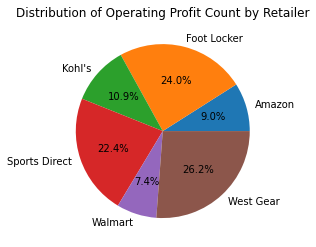

In [51]:
# Grouping by "Retailer" and calculating the total operating profit for each retailer
dff = adidas.groupby(["Retailer"])[["Operating_Profit"]].sum().reset_index()

# Create a pie chart to show the distribution of operating profit by retailer
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')  # Setting the background color of the figure

# Plotting the pie chart
plt.pie(dff["Operating_Profit"], labels=dff['Retailer'], autopct="%1.1f%%")

# Setting the title of the plot
plt.title('Distribution of Operating Profit Count by Retailer')

# Displaying the plot
plt.show()